In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
#Loading data from the file directory
os.chdir('C:/Users/ELITEBOOK COI5/Desktop/Michael Work/Coding & Programming/Public Data/Cars')
cars=pd.read_csv('car_data.csv')
cars.head()

In [3]:
#Assessing cars  for any missing value
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
#There are currently no any any missing values 

Exploring the variables 


In [5]:
#Checking the unique brand names in cars
cars['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

Text(0.5, 1.0, 'Distribution of cars based on year of purchase ')

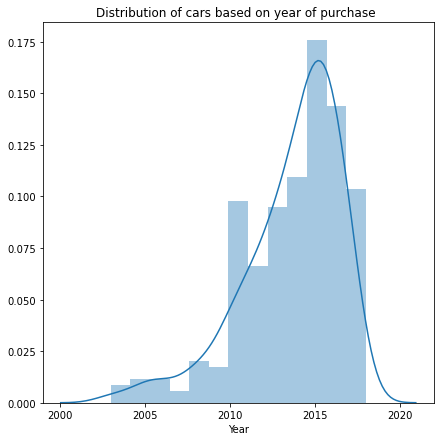

In [11]:
#Exploring distribution of cars based on years
plt.figure(figsize=(7,7))
sns.distplot(cars['Year'])
plt.title('Distribution of cars based on year of purchase ')

From the above histogram , it seems most of the recorded  years of purchase for most cars is  betweeen 2010 and 2017 with high purchases in  2015.

4.661295681063123
count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
80%        7.050000
90%        9.500000
max       35.000000
Name: Selling_Price, dtype: float64


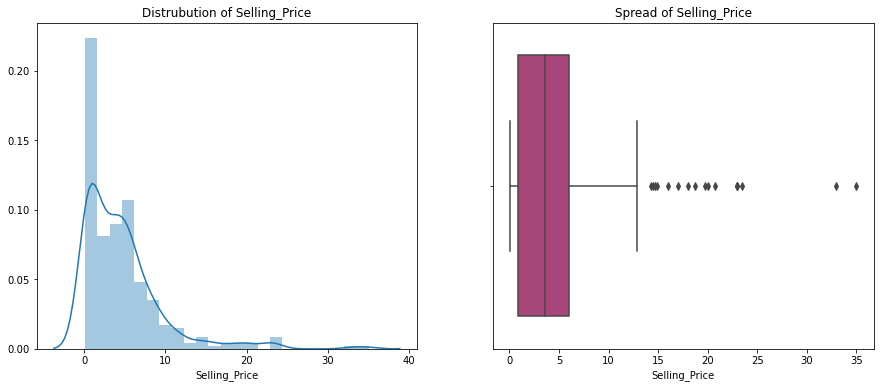

In [23]:
#Assesing selling_price and present price
def distribution_assessment(x):
    print (cars[x].mean())
    print (cars[x].describe(percentiles=[0.25, 0.5, 0.75, 0.80, 0.90]))
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    sns.distplot(cars[x])
    plt.title('Distrubution of ' + x)
    
    plt.subplot(1,2,2)
    sns.boxplot(cars[x], palette='magma')
    plt.title('Spread of '+ x)
    
distribution_assessment('Selling_Price')

7.628471760797343
count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
80%       10.790000
90%       14.790000
max       92.600000
Name: Present_Price, dtype: float64


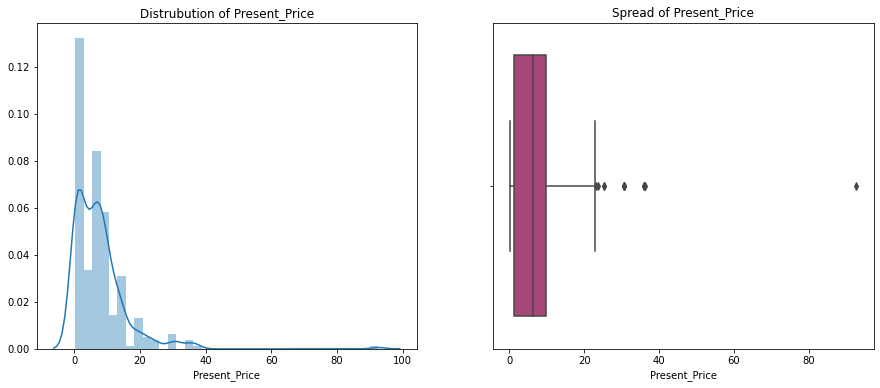

In [26]:
distribution_assessment ('Present_Price')

It seems the present price is lighlty higher than the selling_price . Even though there are not much details , the present price could indicate the price of the current brand new car. This can further be explored  by creating  a column of difference between  the present price and the selling price.

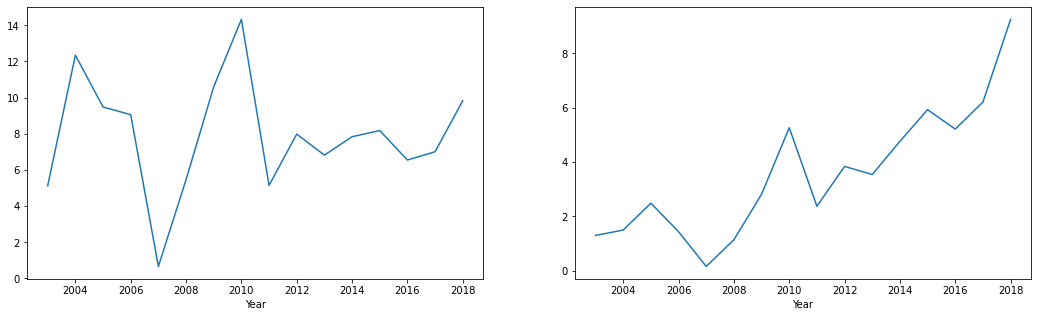

In [98]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
cars.groupby(['Year'])['Present_Price'].mean().plot()

plt.subplot(1,2,2)
cars.groupby(['Year'])['Selling_Price'].mean().plot()

In [28]:
cars['Price_difference']=cars['Present_Price']-cars['Selling_Price']
cars['Price_difference'].head()

0    2.24
1    4.79
2    2.60
3    1.30
4    2.27
Name: Price_difference, dtype: float64

In [31]:
#let check if there are any negative differences
cars[cars['Price_difference']<0]['Price_difference'].count()

0

From the above , there is none.If we assume this is the present price we can calculate depreciation % based on the present price. We will also calculate the  age of the cars with  the current year set to  2020

In [33]:
#Calculating depreciation 
cars['depreciation']=(cars['Price_difference']/cars['Present_Price'])*100
cars['depreciation'].head()

0    40.071556
1    50.209644
2    26.395939
3    31.325301
4    33.042213
Name: depreciation, dtype: float64

In [34]:
#Calculating age of cars
cars['Age']=cars['Year'].apply(lambda x: 2020-x)
cars['Age'].head()

0    6
1    7
2    3
3    9
4    6
Name: Age, dtype: int64

6.372093023255814
count    301.000000
mean       6.372093
std        2.891554
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
80%        8.000000
90%       10.000000
max       17.000000
Name: Age, dtype: float64


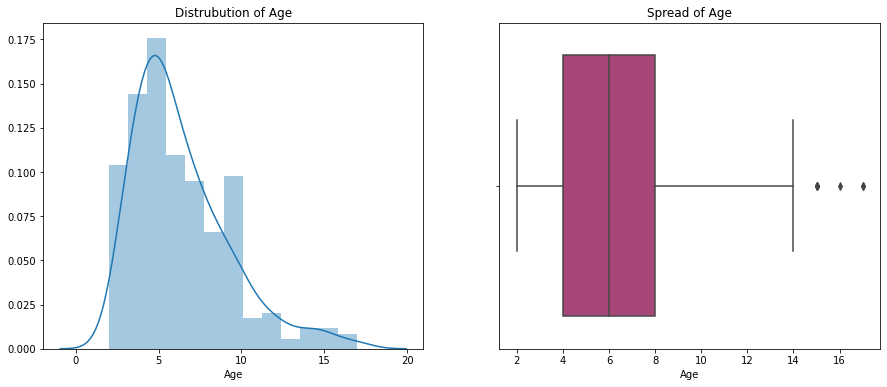

In [35]:
distribution_assessment('Age')

In [38]:
#Creating column to for the annual depreciation  based on  age
cars['depreciation_per_annum']=cars['depreciation']/cars['Age']
cars['depreciation_per_annum'].head()

0    6.678593
1    7.172806
2    8.798646
3    3.480589
4    5.507035
Name: depreciation_per_annum, dtype: float64

5.595705772587601
count    301.000000
mean       5.595706
std        2.007408
min        0.268637
25%        4.468085
50%        5.811138
75%        6.997743
80%        7.172806
90%        7.976190
max       11.436170
Name: depreciation_per_annum, dtype: float64


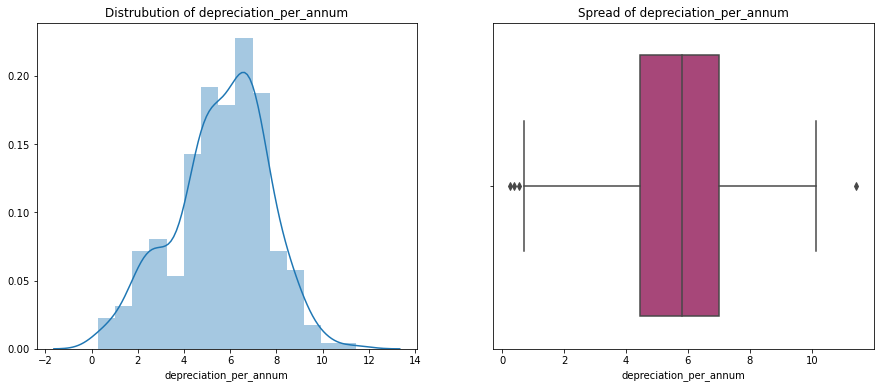

In [39]:
distribution_assessment('depreciation_per_annum')

36947.20598006644
count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
80%       53000.000000
90%       65000.000000
max      500000.000000
Name: Kms_Driven, dtype: float64


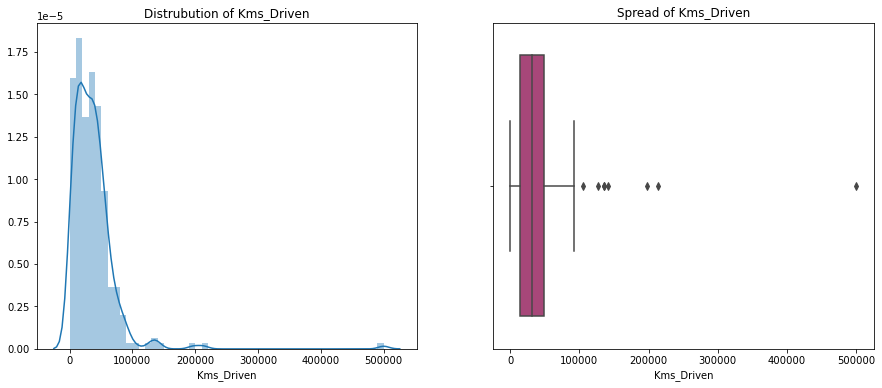

In [41]:
#Assesing the the distance variable
distribution_assessment('Kms_Driven')


Based on above distribution, about 90% of the  cars have been driven for a total distance of 65,000 or less, with the mean distance of about 36,000 kms. However ,  there are also quite a few outliers  in the higher with a total distance of upto  500,00 km .This will be invistaged further 

CATEGORICAL VARIABLES
1. Fuel_Type
2. Seller_Type
3. Transmission

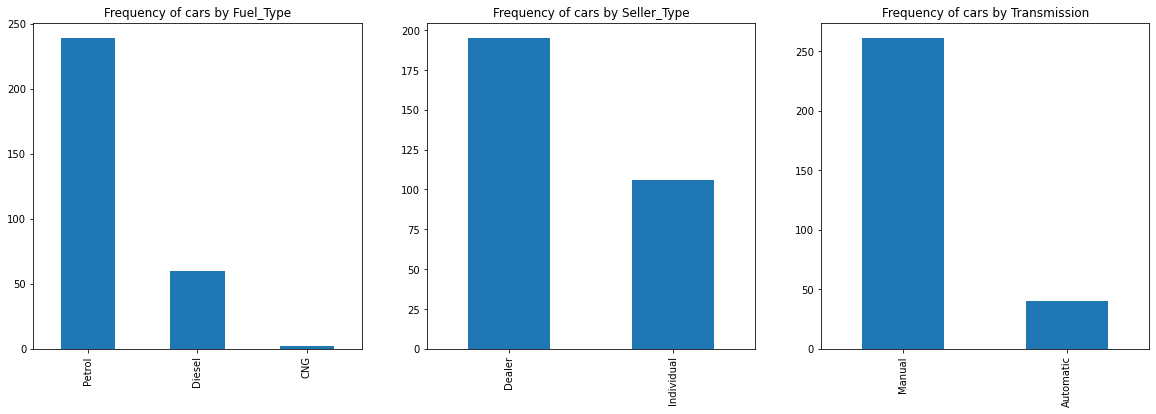

In [53]:
#Checking frequency of groups

def plotter(x, fig):
    plt.subplot(1,3,fig)
    cars[x].value_counts().sort_values(ascending= False).plot(kind='bar')
    plt.title('Frequency of cars by ' + x)
    

plt.figure(figsize=(20,6))   
plotter('Fuel_Type', 1)
plotter('Seller_Type',2 )
plotter('Transmission',3)
    

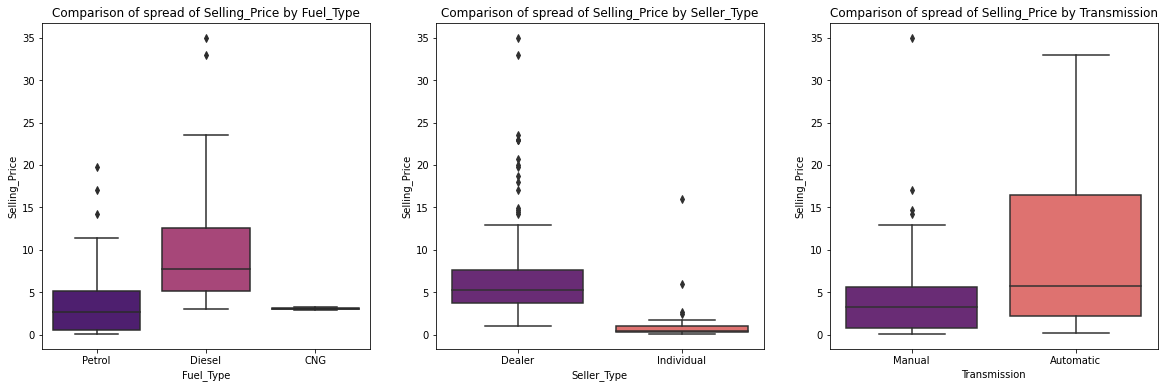

In [60]:
#We can also compare the mprices based on the above categories
def box_plotter(x, y, fig):
    plt.subplot(1,3,fig)
    sns.boxplot(x=cars[x],y=cars[y], palette='magma')
    plt.title('Comparison of spread of ' + y +' by ' + x)
    
#Selling_price by categories

plt.figure(figsize=(20,6))
box_plotter('Fuel_Type', 'Selling_Price', 1)
box_plotter('Seller_Type', 'Selling_Price', 2)
box_plotter('Transmission', 'Selling_Price', 3)
    

As seen above, there are considerable differences in prices based on the  fuel_type  with diesel cars going for slighlty higher prices. Dealers also tend to sell at higher prices compared to individuals  (Although the number of individuals  considerably lower.We can create  a pivot to check  compare the above two based on price



In [69]:
#Creating  a pivot_table
pivot=cars.pivot_table(values=['Selling_Price', 'Age'], 
                         columns=['Seller_Type'],index=['Fuel_Type'], fill_value=0)
pivot


Age            Selling_Price           
Seller_Type    Dealer Individual        Dealer Individual
Fuel_Type                                                
CNG          7.000000    0.00000      3.100000   0.000000
Diesel       5.983051    7.00000     10.181525  16.000000
Petrol       6.410448    6.52381      5.252388   0.726857

In [71]:
pivot=cars.pivot_table(values=['Selling_Price', 'depreciation_per_annum'], 
                         columns=['Seller_Type'],index=['Fuel_Type'], fill_value=0)
pivot

Selling_Price            depreciation_per_annum           
Seller_Type        Dealer Individual                 Dealer Individual
Fuel_Type                                                             
CNG              3.100000   0.000000               7.053059   0.000000
Diesel          10.181525  16.000000               5.053340   6.818500
Petrol           5.252388   0.726857               5.786372   5.617732

CORRELATION AND SCATTER PLOTS

In [83]:
cars.loc[cars['Kms_Driven']==500000]=np.nan
cars=cars.dropna(axis=0)

Text(0.5, 1.0, 'Age vs Selling Price')

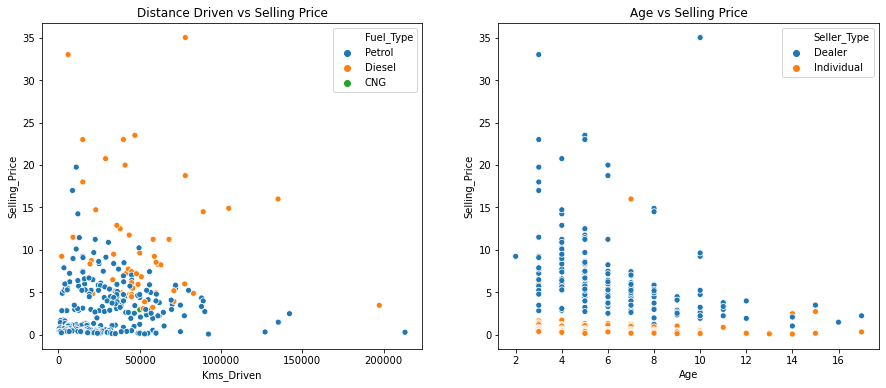

In [88]:
#scatterplot of selling_price vs  distance
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=cars['Kms_Driven'],y= cars['Selling_Price'], hue=cars['Fuel_Type'] )
plt.title('Distance Driven vs Selling Price')

#Scatter_plot of age vs Selling_price
plt.subplot(1,2,2)
sns.scatterplot(x=cars['Age'], y=cars['Selling_Price'], hue=cars['Seller_Type'])
plt.title('Age vs Selling Price')


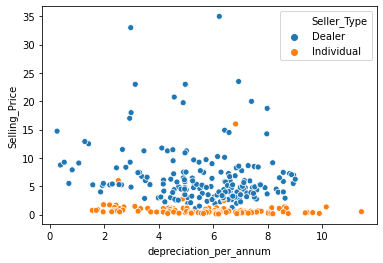

In [92]:
#Scatter plot of depreciation vs  selling_price
sns.scatterplot(x=cars['depreciation'], y=cars['Selling_Price'], hue=cars['Seller_Type'])

In [99]:
#checking variable correlation with  selling price
correlation=cars.corr()
correlation['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878693
Price_difference          0.520214
Year                      0.232166
Kms_Driven                0.088899
Owner                    -0.088980
depreciation_per_annum   -0.132021
depreciation             -0.229238
Age                      -0.232166
Name: Selling_Price, dtype: float64

In [101]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Price_difference',
       'depreciation', 'Age', 'depreciation_per_annum'],
      dtype='object')

In [106]:
cars_lr=cars[['Car_Name', 'Age', 'Selling_Price','Present_Price',
              'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','depreciation_per_annum']]

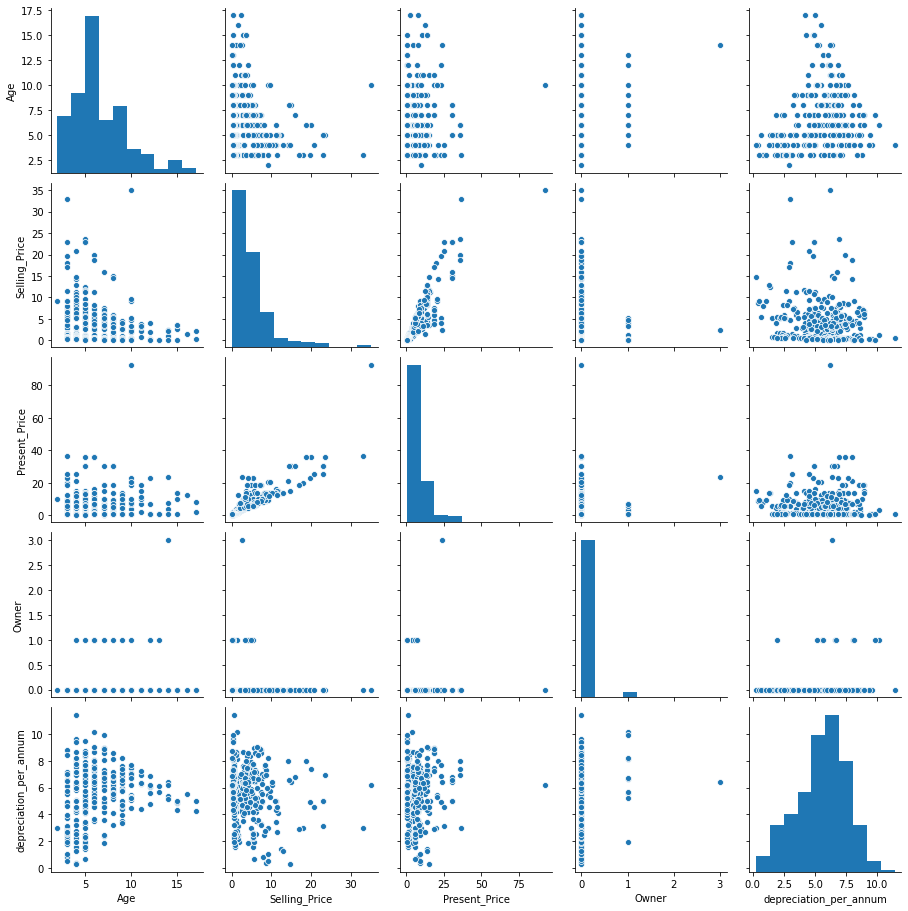

In [107]:
sns.pairplot(cars_lr)

In [109]:
cars_lr.columns

Index(['Car_Name', 'Age', 'Selling_Price', 'Present_Price', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'depreciation_per_annum'],
      dtype='object')

In [111]:
#creating_dummie variables
def dummies(x,df):
    temp=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

cars_lr=dummies('Fuel_Type', cars_lr)

In [118]:
#cars_lr.drop('Owner', axis=1, inplace=True)
cars_lr.head()

,Car_Name,Age,Selling_Price,Present_Price,depreciation_per_annum,Diesel,Petrol,Individual,Manual
0,ritz,6.0,3.35,5.59,6.678593,0,1,0,1
1,sx4,7.0,4.75,9.54,7.172806,1,0,0,1
2,ciaz,3.0,7.25,9.85,8.798646,0,1,0,1
3,wagon r,9.0,2.85,4.15,3.480589,0,1,0,1
4,swift,6.0,4.60,6.87,5.507035,1,0,0,1


In [128]:
cars_lr.drop('Car_Name', axis=1, inplace=True)

In [129]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test=train_test_split(cars_lr, train_size=0.7, test_size=0.3,
                                  random_state=100)

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['Age', 'Selling_Price', 'Present_Price', 'depreciation_per_annum']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [131]:
df_train.head()

,Age,Selling_Price,Present_Price,depreciation_per_annum,Diesel,Petrol,Individual,Manual
284,0.333333,0.095867,0.058938,0.561193,0,1,0,1
97,0.066667,0.483352,0.197221,0.269749,0,1,0,1
276,0.200000,0.243685,0.142516,0.709859,0,1,0,1
263,0.133333,0.184845,0.078476,0.334416,0,1,0,1
132,0.066667,0.016935,0.005210,0.683344,0,1,1,1


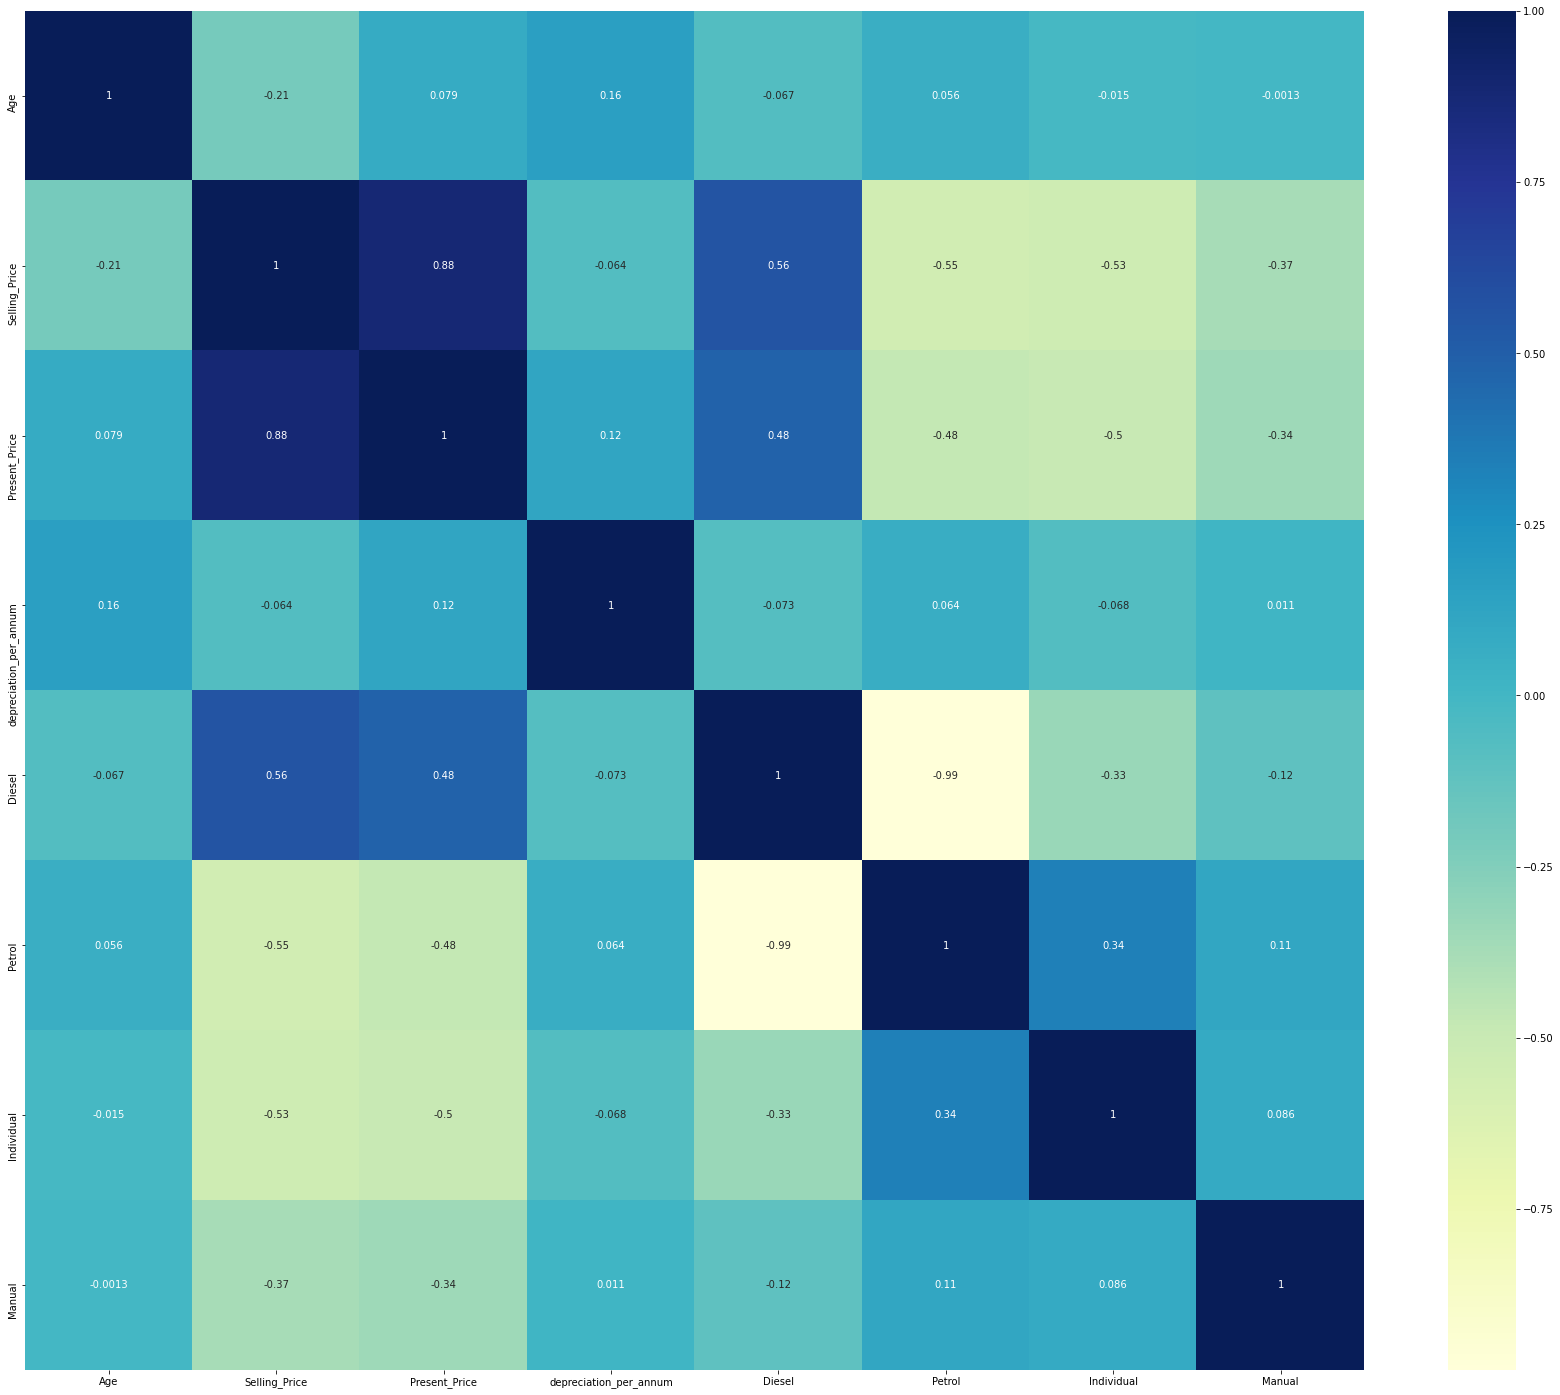

In [123]:
#Correlation using heatmap
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [132]:
#Dividing data into X and y variables
y_train=df_train.pop('Selling_Price')
X_train=df_train

MODEL BUILDING

In [133]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
X_train.head()

,Age,Present_Price,depreciation_per_annum,Diesel,Petrol,Individual,Manual
284,0.333333,0.058938,0.561193,0,1,0,1
97,0.066667,0.197221,0.269749,0,1,0,1
276,0.200000,0.142516,0.709859,0,1,0,1
263,0.133333,0.078476,0.334416,0,1,0,1
132,0.066667,0.005210,0.683344,0,1,1,1


In [135]:
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe=RFE(lm, 10)
rfe=rfe.fit(X_train, y_train)

c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [136]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_ ))

[('Age', True, 1),
 ('Present_Price', True, 1),
 ('depreciation_per_annum', True, 1),
 ('Diesel', True, 1),
 ('Petrol', True, 1),
 ('Individual', True, 1),
 ('Manual', True, 1)]

In [138]:
X_train.columns[rfe.support_]

Index(['Age', 'Present_Price', 'depreciation_per_annum', 'Diesel', 'Petrol',
       'Individual', 'Manual'],
      dtype='object')

BUILDING MODELS USING STATSMODEL, FOR THE DETAILED STATISTICS

In [140]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Age,Present_Price,depreciation_per_annum,Diesel,Petrol,Individual,Manual
284,0.333333,0.058938,0.561193,0,1,0,1
97,0.066667,0.197221,0.269749,0,1,0,1
276,0.200000,0.142516,0.709859,0,1,0,1
263,0.133333,0.078476,0.334416,0,1,0,1
132,0.066667,0.005210,0.683344,0,1,1,1


In [141]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [142]:
# MODEL 1
X_train_new=build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.25e-97
Time:                        03:47:32   Log-Likelihood:                 347.88
No. Observations:                 210   AIC:                            -679.8
Df Residuals:                     202   BIC:                            -653.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [143]:
X_train_new=X_train_rfe.drop(['Diesel', 'Petrol'], axis=1)

In [144]:
X_train_new=build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     331.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.32e-96
Time:                        03:51:26   Log-Likelihood:                 337.59
No. Observations:                 210   AIC:                            -663.2
Df Residuals:                     204   BIC:                            -643.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [145]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,19.95
2,Present_Price,1.53
4,Individual,1.34
5,Manual,1.15
3,depreciation_per_annum,1.04
1,Age,1.03


In [146]:
#Residual Analysis of Model
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

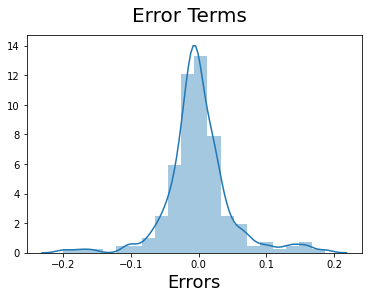

In [147]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [148]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
df_test.head()

,Age,Selling_Price,Present_Price,depreciation_per_annum,Diesel,Petrol,Individual,Manual
223,0.181818,0.247720,0.252854,0.175610,1,0,0,1
139,0.181818,0.015198,0.017544,0.626958,0,1,1,1
217,0.090909,0.092705,0.114453,0.613665,0,1,0,1
202,0.181818,0.130699,0.149819,0.369534,0,1,0,1
250,0.090909,0.389058,0.369813,0.069225,1,0,0,1


In [151]:
#Dividing into X and y
y_test = df_test.pop('Selling_Price')
X_test = df_test

In [152]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [153]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [157]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-0.4367654626219679

Text(0, 0.5, 'y_pred')

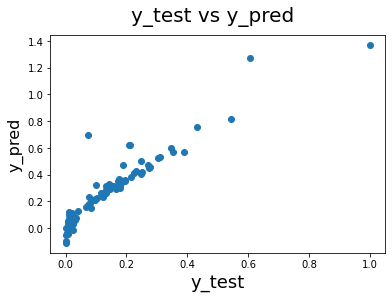

In [155]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [156]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     331.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.32e-96
Time:                        04:00:07   Log-Likelihood:                 337.59
No. Observations:                 210   AIC:                            -663.2
Df Residuals:                     204   BIC:                            -643.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0